## Imports

In [2]:
%load_ext autoreload

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from utils import *

# Performances wrt Model Size and Training time

In [4]:
df_all = load_results()

/storagenfs/m.petix/hlt_usppm/src/analysis_plots/utils.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[:4]["epoch"] = -1


ahotrod/electra_large_discriminator_squad2_512
ahotrod/electra_large_discriminator_squad2_512
microsoft/deberta-v3-large
microsoft/deberta-v3-large


In [5]:
df_all = df_all[(df_all.stratify_on=='stratification_index') & (df_all.loss=='bce')]

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2863 entries, 0 to 14
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     2863 non-null   int64  
 1   val_score                 2863 non-null   float64
 2   val_loss                  2863 non-null   float64
 3   batch_size                2307 non-null   float64
 4   time_this_iter_s          2863 non-null   float64
 5   done                      2863 non-null   bool   
 6   timesteps_total           0 non-null      float64
 7   episodes_total            0 non-null      float64
 8   training_iteration        2863 non-null   int64  
 9   trial_id                  2863 non-null   object 
 10  experiment_id             2863 non-null   object 
 11  date                      2863 non-null   object 
 12  timestamp                 2863 non-null   int64  
 13  time_total_s              2863 non-null   float64
 14  pid       

In [7]:
df_grouped = df_all.groupby(["model","warmup_steps","features","fold"]).agg("max").reset_index()
df_grouped = df_grouped.groupby(["model","warmup_steps","features"]).agg("mean").reset_index()
df_grouped

,model,warmup_steps,features,fold,index,val_score,val_loss,batch_size,time_this_iter_s,done,...,time_since_restore,timesteps_since_restore,iterations_since_restore,warmup_time,encoder_lr,epoch,required_epochs,total_time,mean_epoch_time,train_loss
0,BERT,0.00,CPC,1.5,23.0,0.791863,0.691974,128.0,213.988485,False,...,4088.049825,0.0,24.0,0.005058,0.00002,7.0,8.0,6399.0,182.828571,NaN
1,BERT,0.00,CPC code,1.5,23.0,0.782090,0.689181,NaN,143.602911,False,...,2709.711365,0.0,24.0,0.006336,0.00002,7.0,8.0,4189.0,119.685714,NaN
2,BERT,0.00,CPC+SACST,1.5,27.0,0.802271,0.692222,64.0,350.154833,False,...,7081.298594,0.0,28.0,0.005058,0.00002,7.0,7.0,10854.0,310.114285,NaN
3,BERT,0.00,No context,1.5,23.0,0.783248,0.688909,NaN,146.618163,False,...,2581.390447,0.0,24.0,0.005594,0.00002,7.0,8.0,3974.0,113.542857,NaN
4,BERT,0.00,SACST,1.5,23.0,0.794293,0.691415,128.0,298.881621,False,...,5813.862913,0.0,24.0,0.005058,0.00002,7.0,8.0,9059.0,258.828571,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Electra-l,0.01,SACT,1.5,23.0,-0.005739,0.727722,64.0,3028.611456,False,...,41294.136546,0.0,24.0,0.005832,0.00002,7.0,5.0,96717.0,2763.342857,NaN
73,Electra-l,0.10,CPC,1.5,23.0,0.852554,0.727369,32.0,806.662236,False,...,15415.292064,0.0,24.0,0.005821,0.00002,7.0,8.0,24215.0,691.857142,NaN
74,Electra-l,0.10,CPC+SACST,1.5,27.0,0.469793,0.720888,16.0,1572.071825,False,...,27488.166396,0.0,28.0,0.005821,0.00002,7.0,8.0,42015.0,1200.428571,NaN
75,Electra-l,0.10,SACST,1.5,27.0,0.319281,0.721918,16.0,1245.102703,False,...,24776.545467,0.0,28.0,0.005821,0.00002,7.0,8.0,38286.0,1093.885714,NaN


In [8]:

# invert model_labels dictionary
model_labels_inv = {v: k for k, v in model_labels.items()}
df_grouped['number_of_parameters'] = df_grouped.model.apply(lambda x: model_sizes[model_labels_inv[x]])
df_grouped

,model,warmup_steps,features,fold,index,val_score,val_loss,batch_size,time_this_iter_s,done,...,timesteps_since_restore,iterations_since_restore,warmup_time,encoder_lr,epoch,required_epochs,total_time,mean_epoch_time,train_loss,number_of_parameters
0,BERT,0.00,CPC,1.5,23.0,0.791863,0.691974,128.0,213.988485,False,...,0.0,24.0,0.005058,0.00002,7.0,8.0,6399.0,182.828571,NaN,109482240
1,BERT,0.00,CPC code,1.5,23.0,0.782090,0.689181,NaN,143.602911,False,...,0.0,24.0,0.006336,0.00002,7.0,8.0,4189.0,119.685714,NaN,109482240
2,BERT,0.00,CPC+SACST,1.5,27.0,0.802271,0.692222,64.0,350.154833,False,...,0.0,28.0,0.005058,0.00002,7.0,7.0,10854.0,310.114285,NaN,109482240
3,BERT,0.00,No context,1.5,23.0,0.783248,0.688909,NaN,146.618163,False,...,0.0,24.0,0.005594,0.00002,7.0,8.0,3974.0,113.542857,NaN,109482240
4,BERT,0.00,SACST,1.5,23.0,0.794293,0.691415,128.0,298.881621,False,...,0.0,24.0,0.005058,0.00002,7.0,8.0,9059.0,258.828571,NaN,109482240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Electra-l,0.01,SACT,1.5,23.0,-0.005739,0.727722,64.0,3028.611456,False,...,0.0,24.0,0.005832,0.00002,7.0,5.0,96717.0,2763.342857,NaN,334092288
73,Electra-l,0.10,CPC,1.5,23.0,0.852554,0.727369,32.0,806.662236,False,...,0.0,24.0,0.005821,0.00002,7.0,8.0,24215.0,691.857142,NaN,334092288
74,Electra-l,0.10,CPC+SACST,1.5,27.0,0.469793,0.720888,16.0,1572.071825,False,...,0.0,28.0,0.005821,0.00002,7.0,8.0,42015.0,1200.428571,NaN,334092288
75,Electra-l,0.10,SACST,1.5,27.0,0.319281,0.721918,16.0,1245.102703,False,...,0.0,28.0,0.005821,0.00002,7.0,8.0,38286.0,1093.885714,NaN,334092288


In [9]:
color_map = {
        "DistilBERT":"green",
        "BERT":"purple",
        "BERT-for-patents":"blue",
        "Electra-l":"orange",
        "DeBERTA-v3-l":"red"
}

features_color_map = {
        "SACT":"green",
        "SACST":"purple",
        "CPC":"blue",
        "CPC+SACST":"orange",
        "No context":"gray",
        "CPC code":"black",
}

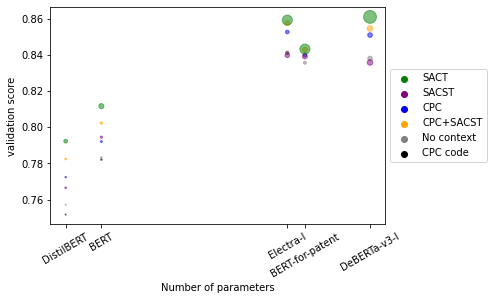

In [18]:
df = df_grouped[df_grouped.val_score>0].groupby(["model","features"]).agg("max").reset_index()
# set the row for electra and SACT to have val_score of 85.91
df.loc[(df.model=="Electra-l") & (df.features=="SACT"), "val_score"] = 0.8591
df.loc[(df.model=="Electra-l") & (df.features=="SACST"), "val_score"] = 0.8397
df.loc[(df.model=="Electra-l") & (df.features=="CPC+SACST"), "val_score"] = 0.8574
df.loc[(df.model=="Electra-l") & (df.features=="No context"), "val_score"] = 0.8409
df.loc[(df.model=="Electra-l") & (df.features=="CPC code"), "val_score"] = 0.8411

df.loc[(df.model=="BERT-for-patent") & (df.features=="SACT"), "val_score"] = 0.8431
df.loc[(df.model=="BERT-for-patent") & (df.features=="CPC+SACST"), "val_score"] = 0.8428
df.loc[(df.model=="BERT-for-patent") & (df.features=="SACST"), "val_score"] = 0.8390

df.loc[(df.model=="DeBERTa-v3-l") & (df.features=="CPC+SACST"), "val_score"] = 0.8545
df.loc[(df.model=="DeBERTa-v3-l") & (df.features=="CPC code"), "val_score"] = 0.8413

colors = [features_color_map[f] for f in df.features]
labels = [model for model in df.model]
plt.scatter(df['number_of_parameters'], df['val_score'], s=df['mean_epoch_time']/50, c=colors, alpha=0.5)

handles = []
for f, color in features_color_map.items():
    handles.append(plt.scatter([], [], c=color, label=f))
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Number of parameters')
plt.ylabel('validation score')
plt.xticks(list(model_sizes.values())[:5], labels=model_labels.values(), rotation=30)

plt.savefig('plots/Performance vs model complexity and training time.png',bbox_inches="tight")

[-1000.     0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.] [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


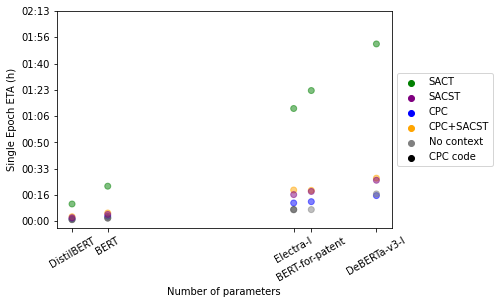

In [17]:
# Training time w.r.t features

df = df_grouped.groupby(["model","features"]).agg('mean').reset_index()

colors = [features_color_map[feature_name] for feature_name in df.features]

plt.scatter(df['number_of_parameters'], df.mean_epoch_time,c=colors, alpha=0.5)
handles = []
for feature_name, color in features_color_map.items():
    handles.append(plt.scatter([], [], c=color, label=feature_name))
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('Number of parameters')
plt.ylabel('Single Epoch ETA (h)')

locs, labels=plt.yticks()
print(locs,labels)
locs = pd.Series(locs[1:])
new_yticks= pd.to_datetime(locs, unit='s').dt.strftime("%H:%M")
plt.yticks(locs, new_yticks, horizontalalignment='right')

plt.xticks(list(model_sizes.values())[:5], labels=model_labels.values(), rotation=30)

plt.savefig('plots/Training time wrt features and models.png', bbox_inches="tight")